In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import ode, odeint
import scipy

In [2]:
def dynGeneralIPM(x,t,params):
    th,r,w,rp = x[0],x[1],x[2],x[3]  # x = [th,r,w,rp]
    m,g,fun,pars = params
    u = fun(x,t,pars)
    tau, f = u[0],u[1]
    xp = np.array([w,rp,
                   (-2*r*rp*w+g*r*np.sin(th)+tau/m)/np.power(r,2),
                   r*w**2-g*np.cos(th)+f/m])
    return xp

def uIPMHorizontalFcn(x,t,params):
    m,g = params
    f = np.array([0,m*g/np.cos(x[0])])
    return f

def uIPMConstantLengthFcn(x,t,params):
    m,g = params
    f = np.array([0,m*g*np.cos(x[0])-m*x[1]*np.power(x[2],2)])
    return f

def uIPMFreeFallFcn(x,t,params):
    m,g = params
    f = np.array([0,0])
    return f

def uIPMFallFcn(x,t,params):
    m,g = params
    f = np.array([0,m*g])
    return f


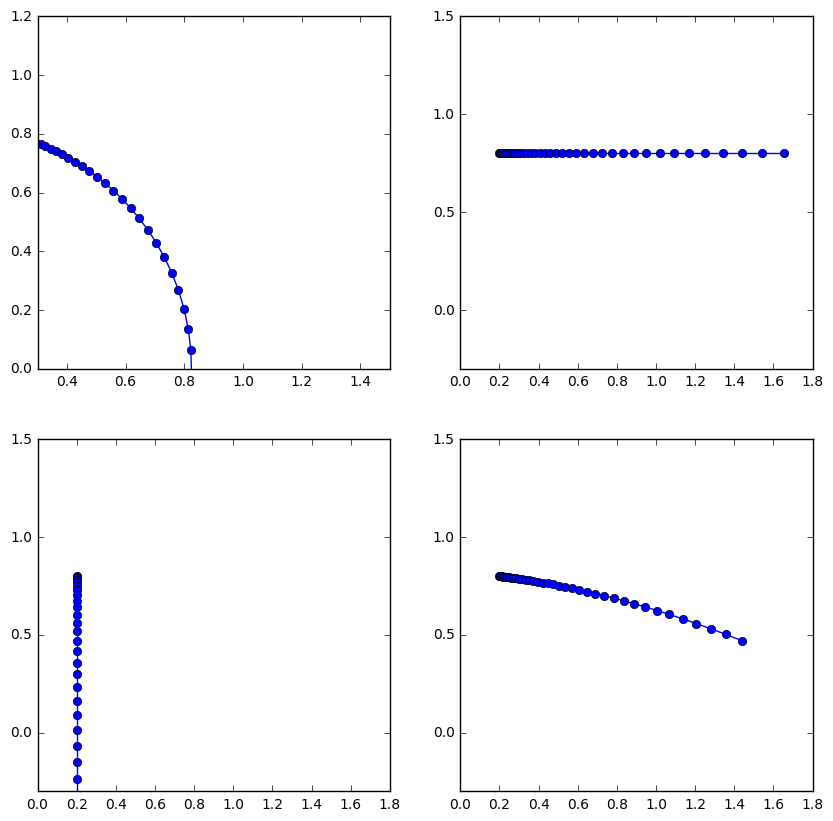

In [3]:
# horizontal from general dynamics of IPM

z,X0 = 0.8,0.2
th0,r0 = np.arctan2(X0,z),np.sqrt(z**2+X0**2)
x0 = np.array([th0,r0,0.0,0.0]) # x = [th,r,w,rp]

m,g = 50,9.81 # uIPMFreeFallFcn # uIPMConstantLengthFcn # uIPMHorizontalFcn
t = np.linspace(0,0.8,41)
sols = []
for fun in {uIPMFreeFallFcn, uIPMConstantLengthFcn, uIPMHorizontalFcn, uIPMFallFcn}:
    pars = (m,g,fun,(m,g),)
    # odeint solver
    sols.append(odeint(dynGeneralIPM, x0, t, args=(pars,)))

plt.figure(1,figsize=(10,10))
for i,sol in enumerate(sols):
    plt.subplot(2,2,i+1),
    plt.plot(sol[:,1]*np.sin(sol[:,0]),sol[:,1]*np.cos(sol[:,0]),'o-')
    plt.axis('equal'),plt.axis((0,1.8,0.0,1.2))

plt.show()


In [4]:
def dynLIPM(x,t,params):
    x,xp = x[0],x[1]
    g,z,pfun = params
    xp = np.array([xp,g/z*(x-pfun(t))])
    return xp


Energia: -0.031, vtop: -0.031, xrev: -0.031: 
Energia: 0.068, vtop: 0.068, xrev: 0.068: 
Energia: 0.068, vtop: 0.068, xrev: 0.068: 
Energia: -0.031, vtop: -0.031, xrev: -0.031: 


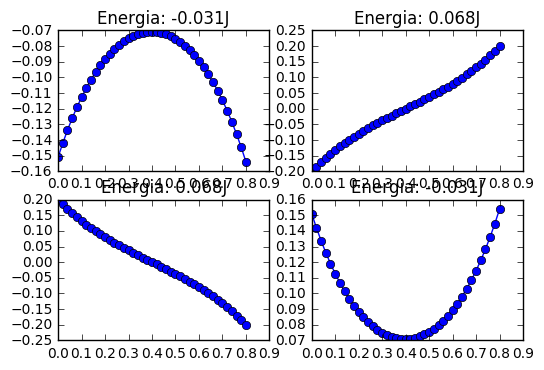

In [5]:
#
x0s = [[-0.151, 0.467],
       [  -0.2, 0.791],
       [   0.2,-0.791],
       [ 0.151,-0.467]]
z,g = 0.8,9.81
t = np.linspace(0,0.8,41)
pars = (g,z,lambda t: 0)
# odeint solver
plt.figure(1,) #figsize=(5,5)
for i,x0 in enumerate(x0s):
    sol = odeint(dynLIPM, x0, t, args=(pars,))
    E = (x0[1]**2-g/z*x0[0]**2)/2
    if E<0: 
        xrev,vrev = np.sqrt(-2*z*E/g), np.nan
    else: 
        xrev,vrev = np.nan, np.sqrt(2*E)
    print('Energia: {0:.3f}, vtop: {0:.3f}, xrev: {0:.3f}: '.format(E,vrev,xrev))
    plt.subplot(2,2,i+1),plt.plot(t,sol[:,0],'o-')
    plt.title('Energia: {0:.3f}J'.format(E))

plt.show()


In [6]:
def stepFcn(t,a=0):
    f = np.zeros_like(t)
    f[t>=a] = 1
    return f

def arrayOfStepFcn(t,params):
    w,a = params
    f = np.zeros_like(t)
    for wi,ai in zip(w,a):
        f += wi*stepFcn(t,ai)
    return f


Energia: 0.068, vtop: 0.068, xrev: 0.068: 


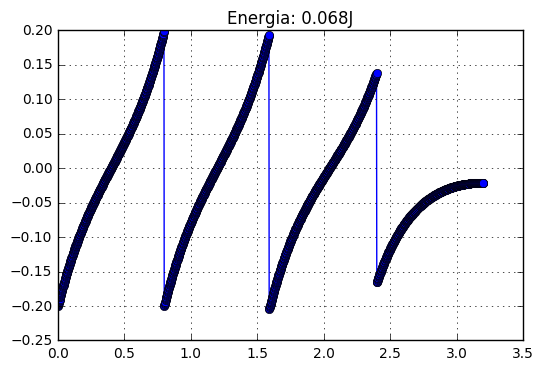

In [7]:
#
x0 = [  -0.2, 0.791]
z,g = 0.8,9.81
t = np.linspace(0,3.2,1601)
zmpFcn = lambda t: 0.4*stepFcn(t,0.8)+0.40*stepFcn(t,1.59)+0.305*stepFcn(t,2.4)
pars = (g,z,zmpFcn)
# odeint solver
sol = odeint(dynLIPM, x0, t, args=(pars,))
E = (x0[1]**2-g/z*x0[0]**2)/2
if E<0: 
    xrev,vrev = np.sqrt(-2*z*E/g), np.nan
else: 
    xrev,vrev = np.nan, np.sqrt(2*E)
print('Energia: {0:.3f}, vtop: {0:.3f}, xrev: {0:.3f}: '.format(E,vrev,xrev))
plt.plot(t,sol[:,0]-zmpFcn(t),'o-'),plt.grid('on')
plt.title('Energia: {0:.3f}J'.format(E))

plt.show()


Energia: 0.000, vtop: 0.000, xrev: 0.000: 


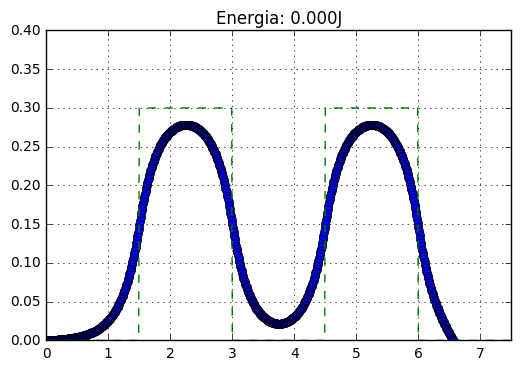

In [13]:
#
# x0 = [  0.00157, 0.0] 
x0 = [  0.0, 0.00546926689437855903172525] 
z,g = 0.8,9.81
dt,tmax = 0.01,7.5
n = int(tmax/dt)+1
t = np.linspace(0,tmax,n)
zmpFcn = lambda t: 0.3*stepFcn(t,1.5)-0.3*stepFcn(t,3.0)+0.3*stepFcn(t,4.5)-0.3*stepFcn(t,6.0)
pars = (g,z,zmpFcn)
# odeint solver
sol = odeint(dynLIPM, x0, t, args=(pars,))
E = (x0[1]**2-g/z*x0[0]**2)/2
if E<0: 
    xrev,vrev = np.sqrt(-2*z*E/g), np.nan
else: 
    xrev,vrev = np.nan, np.sqrt(2*E)
print('Energia: {0:.3f}, vtop: {0:.3f}, xrev: {0:.3f}: '.format(E,vrev,xrev))
plt.plot(t,sol[:,0],'o-',t,zmpFcn(t),'--'),plt.grid('on')
plt.title('Energia: {0:.3f}J'.format(E))
plt.axis((0,7.5,0.0,0.4))

plt.show()


In [ ]:
dt, tmax = 0.01, 3.0
n = int(tmax/dt+1)
t = np.linspace(0,tmax,n)
ai = -z/(g*dt**2)
bi = 2*z/(g*dt**2)+1
ci = ai
A = np.zeros((n,n))
for i in range(0,n):
    if i==0:
        A[0,0:2] = [bi,ci]
    elif i==n-1:
        A[n-1,n-2:n] = [ai,bi]
    else:
        A[i,i-1:i+2] = [ai,bi,ci]
        
zmpFcn = lambda t: 0.3*stepFcn(t,1.5)
print(ai,bi,ci)
# posicion
#p = zmpFcn(t)
#p[0] = p[0]-ai*0.3
#p[n-1] = p[n-1]-ci*0.3
#p = zmpFcn(t)
# velocidad
p[0] += +ai*(0.0)*dt
p[n-1] += -ci*(0.0)*dt
A[0,0] += ai
A[n-1,n-1] += ci
x_com = scipy.linalg.solve_triangular(A,p)
plt.plot(t,zmpFcn(t),'--',t,x_com,'o-'),plt.grid('on')#
plt.axis([0,3.0,-0.1,0.4])

print(x_com[-1])

In [ ]:
def dynCartTable(x,t,params):
    A,B,fun,pars = params
    n = x.shape[0]
    xp = np.dot(A,x.reshape((n,1)))+B*(fun(t,pars))
    return xp.reshape((n,))


In [ ]:
fun = arrayOfStepFcn

zc, g = (0.814,9.81)
xc = -0.0
xppc = xc*g/zc
x0 = np.array([xc,0.1,-xppc])
t = np.linspace(0,3,3001)

A,B,a,w = (np.array([[0,1,0],[0,0,1],[0,0,0]]),
           np.array([[0,0,1]]).reshape((3,1)),
#           [ 1.5],        # times
#           [ 0.3])  # step-amplitud
           [ 1.8, 2.6, 3.4, 4.2, 5.0],        # times
           [ 0.1,-0.2, 0.2,-0.2, 0.1])  # step-amplitud

y = fun(t,(w,a))

# odeint solver
sol = odeint(dynCartTable, x0, t, args=((A,B,fun,(w,a)),))
y_zmp = sol[:,0]-zc/g*sol[:,2]

plt.plot(t,y,t,y_zmp,t,sol[:,0])
plt.show()

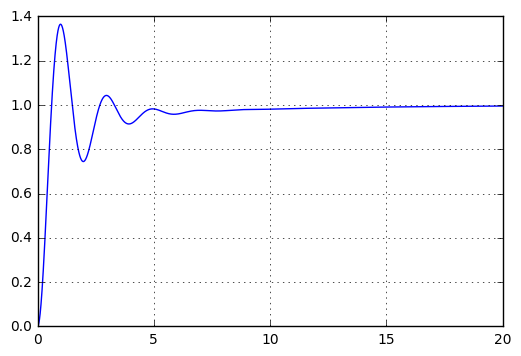

In [69]:
# PI-controller
def dynSys(x,t,params):
    A,B,uFcn,pars = params
    xp = np.dot(A,x.reshape((2,1)))+B*uFcn(x,t,pars)
    return xp.reshape((2,))

def dynSysWithIAction(x,t,params):
    xp = np.zeros_like(x)
    xsys = x[0:2]
    e = 1.5*(stepFcn(t)-xsys[0])
    xp[0:2] = dynSys(xsys,t,params)+np.array([0,x[2]])
    xp[2] = e
    return xp.reshape((3,))

t = np.linspace(0,20,10001)
x0 = np.array([0,0,0])
A,B = np.array([[0,1],[-1,-0.7]]),np.array([0.,1]).reshape((2,1))

fun = lambda x,t,pars: 10*(stepFcn(t,0)-x[0])+1*(0-x[1])

pars = 0
# odeint solver
sol = odeint(dynSysWithIAction, x0, t, args=((A,B,fun,pars),))

plt.plot(t,sol[:,0]),plt.grid('on')
plt.show()